In [58]:
# scikit-learn pereptron and adaline implementations
from sklearn.linear_model import Perceptron as SklearnPerceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import sys
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [59]:
#file_path_brady = '/content/project_adult.csv'
file_path_sam = '/content/project_adult.csv'
file_path_sam_valid  = '/content/project_validation_inputs.csv'

df = pd.read_csv(file_path_sam, na_values='?')
df_valid = pd.read_csv(file_path_sam_valid, na_values='?')


In [60]:
def preprocess_data(df):

  #Change income to a binary variable
  if 'income' in df.columns:
    df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

  #drop education column
  if 'education' in df.columns:
    df = df.drop('education', axis=1)
  #Get rid of education because it's the same as education num but not ordinal

  #drop na
  df = df.dropna()

  # Select categorical columns (object or category types)
  categorical_cols = df.select_dtypes(include=['object', 'category']).columns

  # Initialize encoder
  le = LabelEncoder()

  # Apply LabelEncoder to each categorical column in place
  for col in categorical_cols:
      df[col] = le.fit_transform(df[col])

  return df

In [61]:
df = preprocess_data(df)
df_valid = preprocess_data(df_valid)

In [62]:
# split data into training and test datasets
train = df.drop('income', axis=1) # Features are all columns except 'Unnamed: 0' and 'income'

X = train
y = df['income'] # Target is the 'income' column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [63]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled can be used for training and testing models
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [64]:
def plot_confusion_matrix(cm, y_true):
    """
    Plots the confusion matrix using a heatmap.

    Args:
        cm (np.ndarray): The confusion matrix.
        y_true (np.ndarray): The true labels for the test data.
    """
    # Create the plot using pure matplotlib
    fig, ax = plt.subplots(figsize=(8, 6))

    # Use imshow to create the heatmap
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the unique class names
           xticklabels=np.unique(y_true), yticklabels=np.unique(y_true),
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

##Logistic Regression

In [65]:
model = LogisticRegression(solver='lbfgs', random_state=42, max_iter=200)
model.fit(X_train_scaled, y_train.values.ravel())


# 5. Predictions
y_pred = model.predict(X_test_scaled)

# 6. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8178807947019867

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      3630
           1       0.71      0.45      0.55      1202

    accuracy                           0.82      4832
   macro avg       0.78      0.69      0.72      4832
weighted avg       0.81      0.82      0.80      4832




--- Confusion Matrix ---
[[3415  215]
 [ 665  537]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3630
           1       0.71      0.45      0.55      1202

    accuracy                           0.82      4832
   macro avg       0.78      0.69      0.72      4832
weighted avg       0.81      0.82      0.80      4832



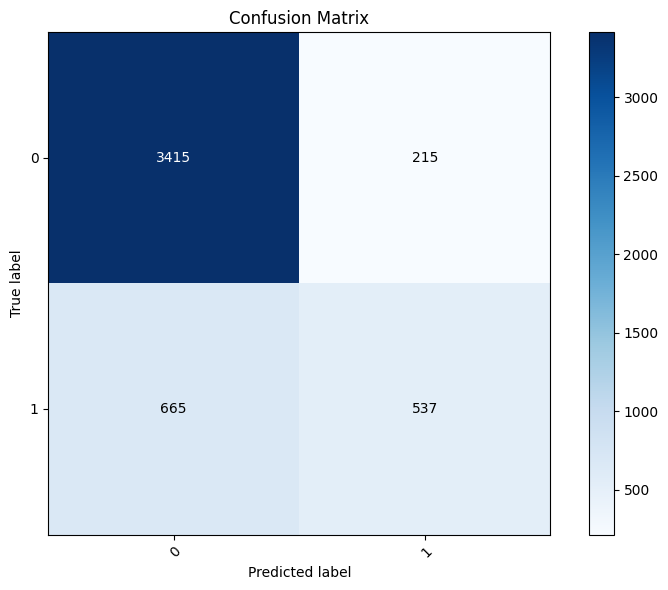

In [66]:
# Generate and display the confusion matrix and classification report
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Plot the predictions and the confusion matrix
plot_confusion_matrix(cm, y_test)

In [67]:
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Inverse of regularization strength
}

# Initialize GridSearchCV with a 5-fold cross-validation strategy.
grid_search = GridSearchCV(
    estimator=LogisticRegression(solver='lbfgs', random_state=42, max_iter=500),
    param_grid=param_grid,
    cv=5,                     # 5-fold cross-validation
    scoring='accuracy',       # Metric to optimize for
    n_jobs=-1,                # Use all available CPU cores
    verbose=1                 # Print progress
)

print("Starting hyperparameter search. This may take a moment...")
grid_search.fit(X_train_scaled, y_train.values.ravel())

Starting hyperparameter search. This may take a moment...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500, random_state=42),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])},
             scoring='accuracy', verbose=1)


--- Best Model Found by GridSearchCV ---
Best parameters: {'C': np.float64(0.08858667904100823)}
Best cross-validation accuracy: 0.8224

 Final evaluation of the best model on the test set...
Final accuracy on test set: 0.8179

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3630
           1       0.72      0.45      0.55      1202

    accuracy                           0.82      4832
   macro avg       0.78      0.69      0.72      4832
weighted avg       0.81      0.82      0.80      4832


Confusion Matrix:
[[3417  213]
 [ 667  535]]


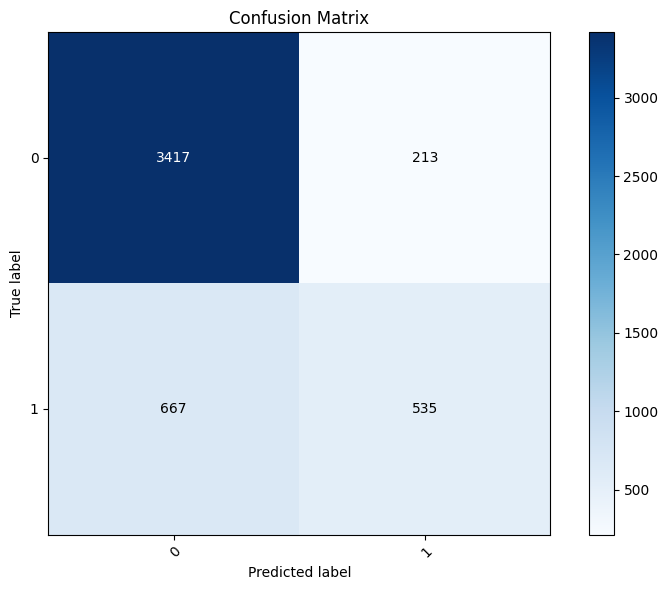

In [68]:
# Get the best estimator from the search.
best_model = grid_search.best_estimator_

print("\n--- Best Model Found by GridSearchCV ---")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

print("\n Final evaluation of the best model on the test set...")
# Predict using the best model found during the search.
final_y_pred = best_model.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, final_y_pred)

print(f"Final accuracy on test set: {final_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, final_y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, final_y_pred)
print(cm)

# Plot the predictions and the confusion matrix
plot_confusion_matrix(cm, y_test)





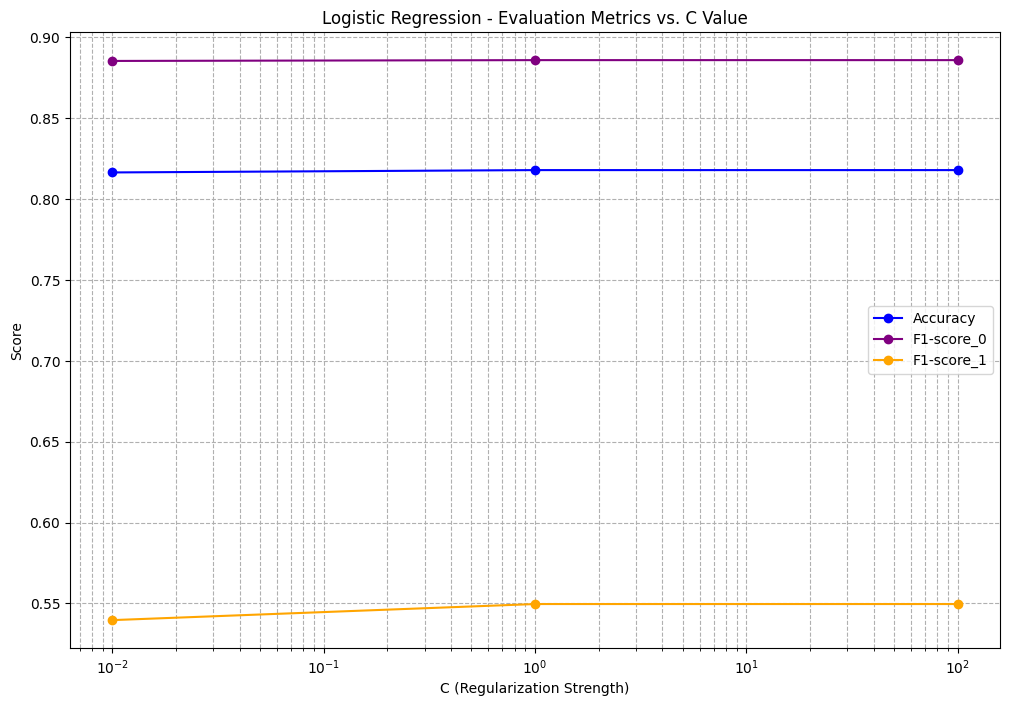


--- F1-scores and Accuracy for Logistic Regression ---
C = 0.01:
  Accuracy: 0.8164
  F1-score (Class 0): 0.8854
  F1-score (Class 1): 0.5397
C = 1.0:
  Accuracy: 0.8179
  F1-score (Class 0): 0.8859
  F1-score (Class 1): 0.5496
C = 100.0:
  Accuracy: 0.8179
  F1-score (Class 0): 0.8859
  F1-score (Class 1): 0.5496


In [69]:
c_values = [0.01, 1.0, 100.0] # Using the same C values as evaluated before

def plot_metrics_vs_c(c_values, metrics_data, model_name):
    """Plots evaluation metrics (Accuracy, Precision, Recall, F1-score) vs. C values."""
    plt.figure(figsize=(12, 8))

    metrics = ['Accuracy', 'F1-score_0', 'F1-score_1'] # Focusing on Accuracy and F1-scores
    colors = ['blue', 'purple', 'orange']

    for i, metric in enumerate(metrics):
        plt.plot(c_values, [m[metric] for m in metrics_data], marker='o', linestyle='-', color=colors[i], label=metric)

    plt.xscale('log')
    plt.xlabel('C (Regularization Strength)')
    plt.ylabel('Score')
    plt.title(f'{model_name} - Evaluation Metrics vs. C Value')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()

# Collect metrics for Logistic Regression
log_reg_metrics = []
for c in c_values:
    log_reg_model = LogisticRegression(C=c, solver='lbfgs', random_state=42, max_iter=200)
    log_reg_model.fit(X_train_scaled, y_train.values.ravel())
    y_pred_log_reg = log_reg_model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred_log_reg, output_dict=True)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred_log_reg),
        'F1-score_0': report['0']['f1-score'],
        'F1-score_1': report['1']['f1-score']
    }
    log_reg_metrics.append(metrics)

# Plot metrics for Logistic Regression
plot_metrics_vs_c(c_values, log_reg_metrics, "Logistic Regression")

#print f1 scores and accuracy
print("\n--- F1-scores and Accuracy for Logistic Regression ---")
for i, c in enumerate(c_values):
    print(f"C = {c}:")
    print(f"  Accuracy: {log_reg_metrics[i]['Accuracy']:.4f}")
    print(f"  F1-score (Class 0): {log_reg_metrics[i]['F1-score_0']:.4f}")
    print(f"  F1-score (Class 1): {log_reg_metrics[i]['F1-score_1']:.4f}")


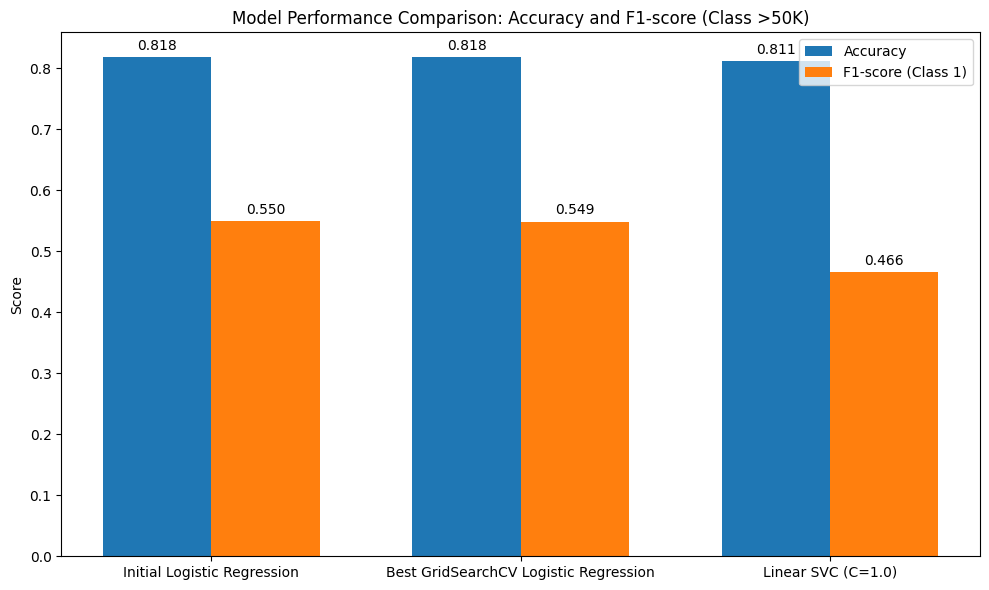

In [70]:

# Collect metrics for comparison
model_names = ['Initial Logistic Regression', 'Best GridSearchCV Logistic Regression', 'Linear SVC (C=1.0)']
accuracies = [
    accuracy_score(y_test, model.predict(X_test_scaled)), # Initial Logistic Regression
    accuracy_score(y_test, best_model.predict(X_test_scaled)), # Best GridSearchCV Logistic Regression
    accuracy_score(y_test, SVC(kernel='linear', C=1, random_state=42).fit(X_train_scaled, y_train.values.ravel()).predict(X_test_scaled)) # Linear SVC (C=1.0)
]

# Get F1-scores for the positive class (class 1)
f1_scores_class_1 = [
    classification_report(y_test, model.predict(X_test_scaled), output_dict=True)['1']['f1-score'],
    classification_report(y_test, best_model.predict(X_test_scaled), output_dict=True)['1']['f1-score'],
    classification_report(y_test, SVC(kernel='linear', C=1, random_state=42).fit(X_train_scaled, y_train.values.ravel()).predict(X_test_scaled), output_dict=True)['1']['f1-score']
]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_scores_class_1, width, label='F1-score (Class 1)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison: Accuracy and F1-score (Class >50K)')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Add value labels on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.3f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

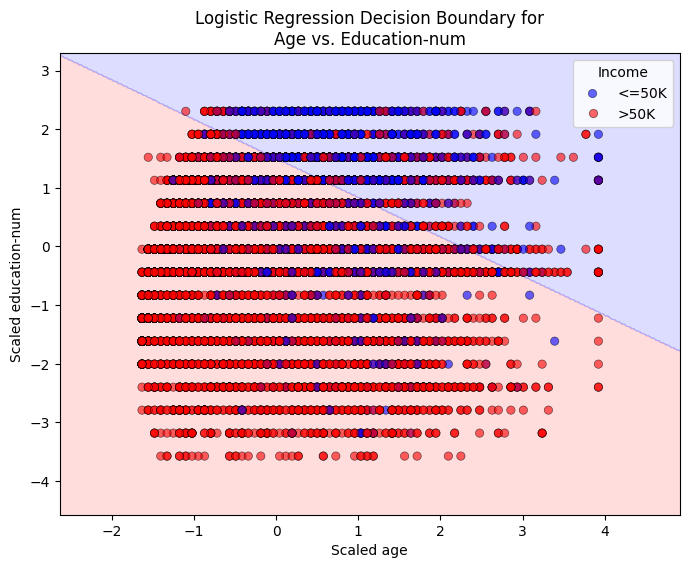

In [71]:
# --- 1. CHOOSE YOUR TWO FEATURES HERE ---
feature1 = 'age'
feature2 = 'education-num'
# -----------------------------------------

# Select the data for the two chosen features
X_2d = df[[feature1, feature2]].values
y_2d = df['income'].values

# Scale the 2-feature data
scaler_2d = StandardScaler()
X_scaled_2d = scaler_2d.fit_transform(X_2d)

# Train a new Logistic Regression model on only these two features
# We use the best 'C' parameter from your previous GridSearchCV for consistency
model_2d = LogisticRegression(C=best_model.C, random_state=42)
model_2d.fit(X_scaled_2d, y_2d)

# Create a meshgrid to plot the decision boundary
x_min, x_max = X_scaled_2d[:, 0].min() - 1, X_scaled_2d[:, 0].max() + 1
y_min, y_max = X_scaled_2d[:, 1].min() - 1, X_scaled_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                       np.arange(y_min, y_max, 0.02))

# Predict on every point in the meshgrid
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# --- Plotting ---
plt.figure(figsize=(8, 6))

# Plot the decision boundary background
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)

# Plot the actual data points
cmap_bold_colors = ['#FF0000', '#0000FF'] # Use the list of colors directly
sns.scatterplot(x=X_scaled_2d[:, 0], y=X_scaled_2d[:, 1], hue=y_2d,
                palette=cmap_bold_colors, alpha=0.6, edgecolor="k")

plt.title(f'Logistic Regression Decision Boundary for\n{feature1.capitalize()} vs. {feature2.capitalize()}')
plt.xlabel(f'Scaled {feature1}')
plt.ylabel(f'Scaled {feature2}')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

In [72]:
#Scale and then put the validation set through the final_y_pred model
df_valid = preprocess_data(df_valid)
# Drop the 'income' and 'Unnamed: 0' columns from df_valid before scaling to match the training data
X_valid_scaled = scaler.transform(df_valid)
final_y_pred_valid = best_model.predict(X_valid_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [74]:
# Using the predictions from the best GridSearchCV Logistic Regression model on the validation set.
# This model was selected as the "best" because it resulted from a hyperparameter tuning process,
# which generally aims to find parameters that generalize well.
# Note: The performance of this model on the test set was very similar to the initial Logistic Regression model.
predictions = {
    'BestGridSearchCVLogisticRegression': final_y_pred_valid
}

# Loop through the predictions and save each one to a CSV file
for model_name, preds in predictions.items():
    # Create the filename based on the specified format
    filename = f'Group_1_{model_name}_PredictedOutputs.csv'

    # Create a pandas DataFrame. A single column named 'income' is appropriate.
    output_df = pd.DataFrame({'income': preds})

    # Save the DataFrame to a CSV file without the index
    output_df.to_csv(filename, index=False)

    # Print a confirmation message
    print(f"Successfully created file: '{filename}'")

Successfully created file: 'Group_1_BestGridSearchCVLogisticRegression_PredictedOutputs.csv'
